### Real world exercise. 2012 "stop and frisk" data

https://en.wikipedia.org/wiki/Stop-and-frisk_in_New_York_City

The stop-question-and-frisk program, or stop-and-frisk, in New York City, is a practice of the New York City Police Department in which police officers stop and question a pedestrian, then frisk them for weapons and other contraband; this is what is known in other places in the United States as the Terry stop. The rules for stop, question, and frisk are found in the state's criminal procedure law section 140.50, and are based on the decision of the United States Supreme Court in the case of Terry v. Ohio. About 685,724 people were stopped in 2011. However, the number of stops has been reduced dramatically since then, to 22,939 in 2015.
Stop-and-frisk got increased attention in the 2016 presidential debate.

In [1]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline
data1=pd.read_csv("data/stop_2012.csv")
data1.head()

,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,month_April,month_August,month_December,...,month_November,month_October,month_September,time_1,time_2,time_3,time_4,time_5,time_6,zipcode
0,278.0,212.0,315.0,213.0,254.0,234.0,241.0,158.0,95.0,142.0,...,96.0,110.0,123.0,349.0,35.0,57.0,206.0,437.0,663.0,10472
1,199.0,79.0,301.0,154.0,163.0,137.0,147.0,114.0,114.0,34.0,...,53.0,65.0,96.0,271.0,38.0,32.0,143.0,248.0,448.0,10037
2,278.0,169.0,283.0,203.0,234.0,197.0,289.0,117.0,133.0,91.0,...,86.0,148.0,175.0,462.0,51.0,56.0,190.0,411.0,483.0,10460
3,175.0,82.0,177.0,176.0,180.0,179.0,206.0,112.0,67.0,134.0,...,23.0,68.0,68.0,157.0,27.0,37.0,97.0,282.0,575.0,11224
4,979.0,647.0,1086.0,773.0,913.0,814.0,885.0,709.0,465.0,290.0,...,395.0,521.0,511.0,1295.0,137.0,110.0,662.0,1553.0,2340.0,10456


In [2]:
#Q0. Get the feature space(All the columns except the last one:"zipcode") and save it as a new data set if you want

#Q1. Get the total "stop"s for each zip code

#Q2. Find the most "dangerous" zip code by the total "stop"s.



In [3]:
X=np.asarray(data1.iloc[:,:-1])
data1.iloc[np.argmax(np.sum(X,axis=1)),:].zipcode

10456.0

In [4]:
#Now if we want to cluster the zip code by the stops timeline data set. 
#(Don't forget to change your data set to numpy array form)

#Q3.Choosing the number of clusters k for Kmeans. Try both elbow method and silhouette score.

In [5]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

('For n_clusters =', 2, 'The average silhouette_score is :', 0.75738631825150893)
('For n_clusters =', 3, 'The average silhouette_score is :', 0.71817974579263)
('For n_clusters =', 4, 'The average silhouette_score is :', 0.64425895577599912)
('For n_clusters =', 5, 'The average silhouette_score is :', 0.64212317543003083)
('For n_clusters =', 6, 'The average silhouette_score is :', 0.60788699410833535)


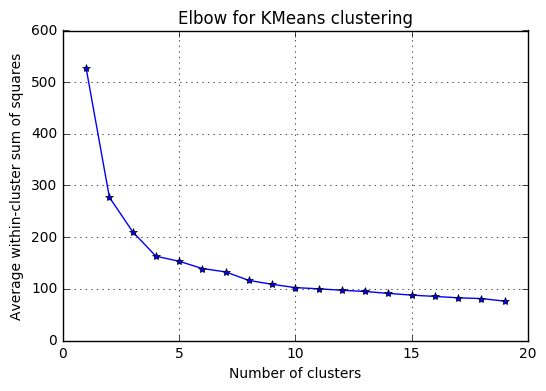

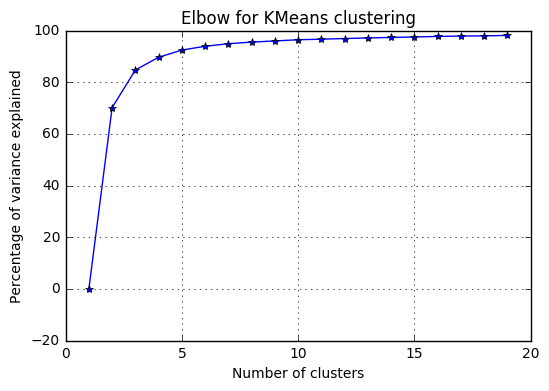

In [6]:
X=np.asarray(data1.iloc[:,:-1])
range_n_clusters = [2, 3, 4, 5, 6]


for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
#elbow
elbow(X,range(1,20))

In [7]:
#Q4. Using kmeans to cluster the zip codes.Choose a k as you wish from your elbow and SS result. And save your result as
#the following dataframe/form.

In [8]:
n=2 # number of clusters.

# Guassian Mixture:
from sklearn.mixture import GaussianMixture
GM=GaussianMixture(n_components=n)
GM.fit(data1.iloc[:,:-1])
res_Mix=GM.predict(data1.iloc[:,:-1])

#Kmeans
import sklearn.cluster as cluster
KM=cluster.KMeans(n_clusters=n)# claster=4
KM.fit(data1.iloc[:,:-1])
res_KM=KM.predict(data1.iloc[:,:-1])

#merge the result with zipcodes for graph plotting
res_Mix=pd.concat((data1.loc[:,'zipcode'],pd.DataFrame(res_Mix)),axis=1)
res_KM=pd.concat((data1.loc[:,'zipcode'],pd.DataFrame(res_KM)),axis=1)
res_KM.head()

,zipcode,0
0,10472,1
1,10037,0
2,10460,1
3,11224,0
4,10456,1


In [9]:
#Q5. Visuilize the result on the map by my function. Make sure your result has the right form
#as in my example.

# For this part you need to: 
#(1) Make sure that your result of Q4 is in the correct form.
#(2) Make sure NY.shp, NY.shx, NY.dbf are downloaded in your working directory.
#(3) Use the defined function plot_on_map(your_result)

In [10]:
#import shapefile
import shapefile as shp
from shapely.geometry.polygon import Polygon
from descartes import PolygonPatch

zipsf = shp.Reader('data/NY.shp')
zipsf_records=zipsf.records()
zipsf_shape=zipsf.shapeRecords()

#for plotting our result
def plot_on_map(result):
    
    x = {}
    for i in range(len(result)):
        key=result.loc[i,'zipcode']
        x[key]=result.loc[i,0]

    #x is a dictionary (zip codes vs values)
    cmap = plt.cm.spectral(np.linspace(0,1,max(x.values())+1))

    fig = plt.figure(figsize = (12,15)) 
    ax = fig.gca() 
    for s in range(0,len(zipsf_records)):
        z=int(zipsf_records[s][0])
        if z in x.keys(): 
            #from here
            k = x[z] 
            c=cmap[k][0:3]    
            shape=zipsf_shape[s]
            x_ = [i[0] for i in shape.shape.points[:]]
            y_ = [i[1] for i in shape.shape.points[:]]
            poly=Polygon(zip(x_,y_))
            #plt.fill(x,y,color=my_cmap[s])
            ax.add_patch(PolygonPatch(poly, fc=c, ec='k', alpha=0.5, zorder=2 ))

    ax.axis('scaled')
    plt.title("clustering result on map")

    import matplotlib.patches as mpatches
    clum_num=len(result.iloc[:,-1].unique())

    handles=[]
    for t in range(clum_num):
        locals()["patch_{}".format(t)] = mpatches.Patch(color=cmap[t][0:3] , label='cluster'+str(t+1))
        handles.append(locals()["patch_{}".format(t)])

    plt.legend(handles=handles,loc='upper left')
    plt.show()

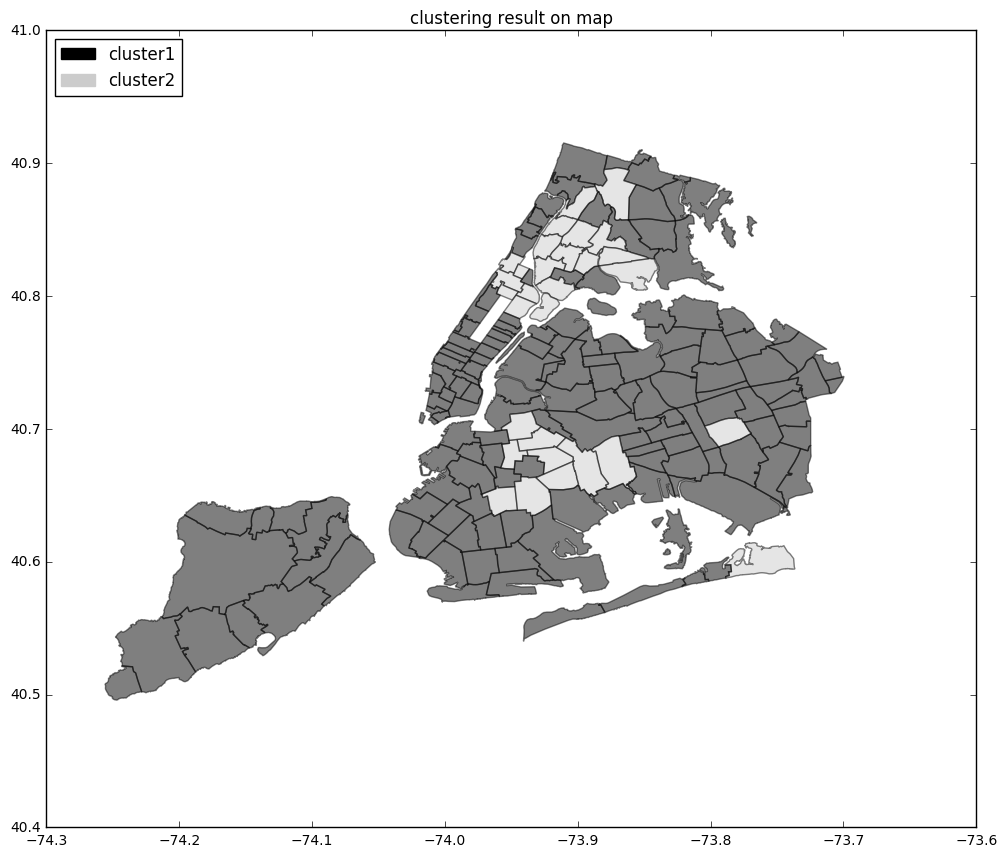

In [11]:
plot_on_map(res_KM)

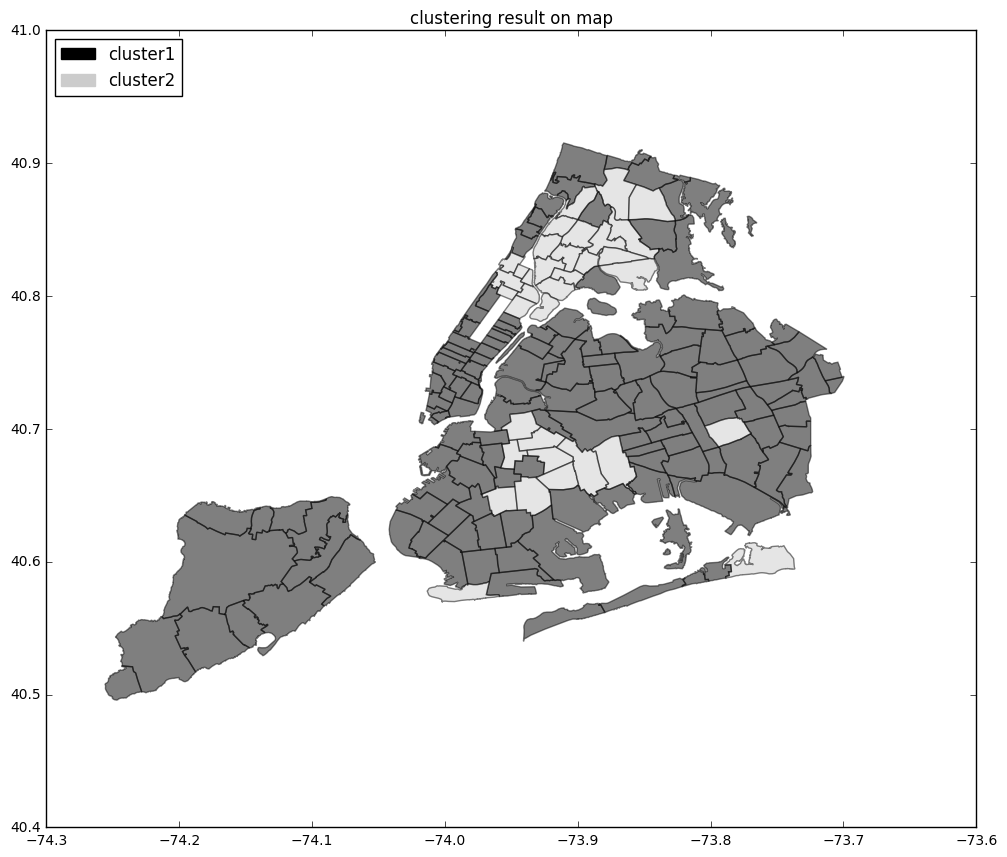

In [12]:
plot_on_map(res_Mix)

In [13]:
#Q6. Repeat Q4 and Q5 using Guassian Mixture model.